In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import xlrd 
import matplotlib.pyplot as plt
import datetime
import seaborn.apionly as sns
%matplotlib inline


data =pd.read_csv("data.csv") 
data= data.drop_duplicates(subset=['Full Name','Year','Laureate ID'])
data=data.replace({'Death Date':"alive"},value="11/26/2019",regex=True)
data=data.replace({'Death Date':"not found"},value="11/26/2019",regex=True)
data = data[data["Laureate Type"] != 'Organization']
data=data.reset_index(drop=True)

data['Birth Year']= data["Birth Date"].str.extract("(\d{4})", expand=False)  
data['Death Year']= data["Death Date"].str.extract("(\d{4})", expand=False)  
data["Age"]=-data['Birth Year'].astype('int')+data["Death Year"].astype('int')
data["Age_Win"]=-data['Birth Year'].astype('int')+data["Year"].astype('int')
data.drop(['Death City', 'Death Country',"Birth Date","Death Date","Birth Year","Death Year","Motivation","Prize","Laureate Type"], axis = 1,inplace = True)
data.drop(['Unnamed: 18'], axis = 1,inplace = True)
data['Birth Country']= data['Birth Country'].str.replace(r'[^(]*\(|\)[^)]*', '')

d=data.groupby('Birth Country')["Organization Country"].apply(lambda x: st.mode(x)[0][0])
d=d[data['Birth Country']]
d_null=data['Organization Country'].isnull()

for i in range(0,data['Birth Country'].size):
    
    if(d_null[i]):
        # print("s")
        if(d[i]==0):
            data.iat[i,10] =data['Birth Country'][i] 
        else:
            data.iat[i,10] =d[i]

data.to_csv("new_data.csv")
data

# t=data.isnull().sum()
# t

c:\users\jack of all trade\appdata\local\programs\python\python36\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
c:\users\jack of all trade\appdata\local\programs\python\python36\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
c:\users\jack of all trade\appdata\local\programs\python\python36\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
c:\users\jack of all trade\appdata\local\programs\python\python36\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be r

,Year,Category,Prize Share,Laureate ID,Full Name,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age_Win
0,1901,Chemistry,1-Jan,160,Jacobus Henricus van 't Hoff,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,59,49
1,1901,Literature,1-Jan,569,Sully Prudhomme,Paris,France,Male,NaN,NaN,France,68,62
2,1901,Medicine,1-Jan,293,Emil Adolf von Behring,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,63,47
3,1901,Peace,2-Jan,462,Jean Henry Dunant,Geneva,Switzerland,Male,NaN,NaN,Switzerland,82,73
4,1901,Peace,2-Jan,463,Frédéric Passy,Paris,France,Male,NaN,NaN,France,90,79
5,1901,Physics,1-Jan,1,Wilhelm Conrad Röntgen,Lennep (Remscheid),Germany,Male,Munich University,Munich,Germany,78,56
6,1902,Chemistry,1-Jan,161,Hermann Emil Fischer,Euskirchen,Germany,Male,Berlin University,Berlin,Germany,67,50
7,1902,Literature,1-Jan,571,Christian Matthias Theodor Mommsen,Garding,Germany,Male,NaN,NaN,Germany,86,85
8,1902,Medicine,1-Jan,294,Ronald Ross,Almora,India,Male,University College,Liverpool,United Kingdom,75,45
9,1902,Peace,2-Jan,464,Élie Ducommun,Geneva,Switzerland,Male,NaN,NaN,Switzerland,73,69


 ### Statistics of the data

In [11]:
data.describe()
data.groupby('Full Name').count().filter(n>1).arrange(desc(n))

,Year,Category,Prize Share,Laureate ID,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age_Win
Full Name,,,,,,,,,,,,
A. Michael Spence,1,1,1,1,1,1,1,1,1,1,1,1
Aage Niels Bohr,1,1,1,1,1,1,1,1,1,1,1,1
Aaron Ciechanover,1,1,1,1,1,1,1,1,1,1,1,1
Aaron Klug,1,1,1,1,1,1,1,1,1,1,1,1
Abdus Salam,1,1,1,1,1,1,1,1,1,1,1,1
Ada E. Yonath,1,1,1,1,1,1,1,1,1,1,1,1
Adam G. Riess,1,1,1,1,1,1,1,1,1,1,1,1
Adolf Friedrich Johann Butenandt,1,1,1,1,1,1,1,1,1,1,1,1
Adolf Otto Reinhold Windaus,1,1,1,1,1,1,1,1,1,1,1,1


### Current age distribution

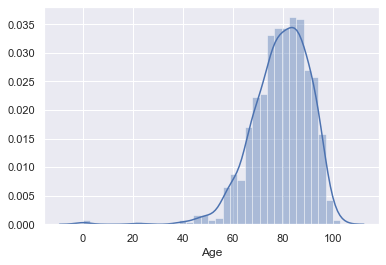

In [176]:
sns.distplot(data.Age, bins=35)
sns.set(rc={"figure.figsize": (10, 5)})

### The distribution of the age when the nobel prize was earned

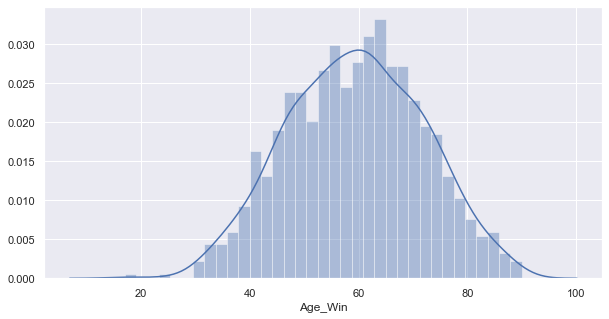

In [178]:
sns.distplot(data.Age_Win, bins=35)
sns.set(rc={"figure.figsize": (10, 5)})

### The distribution of the categories and their counts

Medicine      211
Physics       204
Chemistry     175
Literature    113
Peace         101
Economics      78
Name: Category, dtype: int64

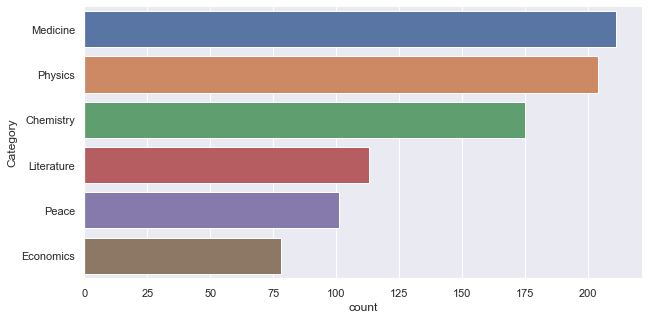

In [180]:
sns.countplot(y="Category", data=data,order=data.Category.value_counts().index,palette='deep')
sns.despine();
data['Category'].value_counts()

### Gender Distribution 

Male      834
Female     48
Name: Sex, dtype: int64

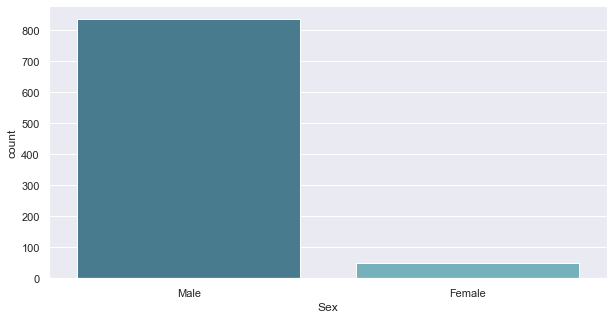

In [181]:
sns.countplot(x="Sex", data=data, palette='GnBu_d')
sns.despine();
data['Sex'].value_counts()

### Organization Country Counts

In [183]:
data['Organization Country'].value_counts()

United States of America               413
United Kingdom                         112
France                                  58
Germany                                 58
Sweden                                  30
Switzerland                             26
Federal Republic of Germany             23
Japan                                   19
Union of Soviet Socialist Republics     16
Denmark                                 13
Netherlands                             12
Belgium                                  9
Norway                                   9
Canada                                   7
Israel                                   6
Italy                                    6
Austria                                  6
Spain                                    6
Australia                                5
Russia                                   5
Northern Ireland                         5
Iran                                     2
Colombia                                 2
Liberia    

### Organization Country Distribution 

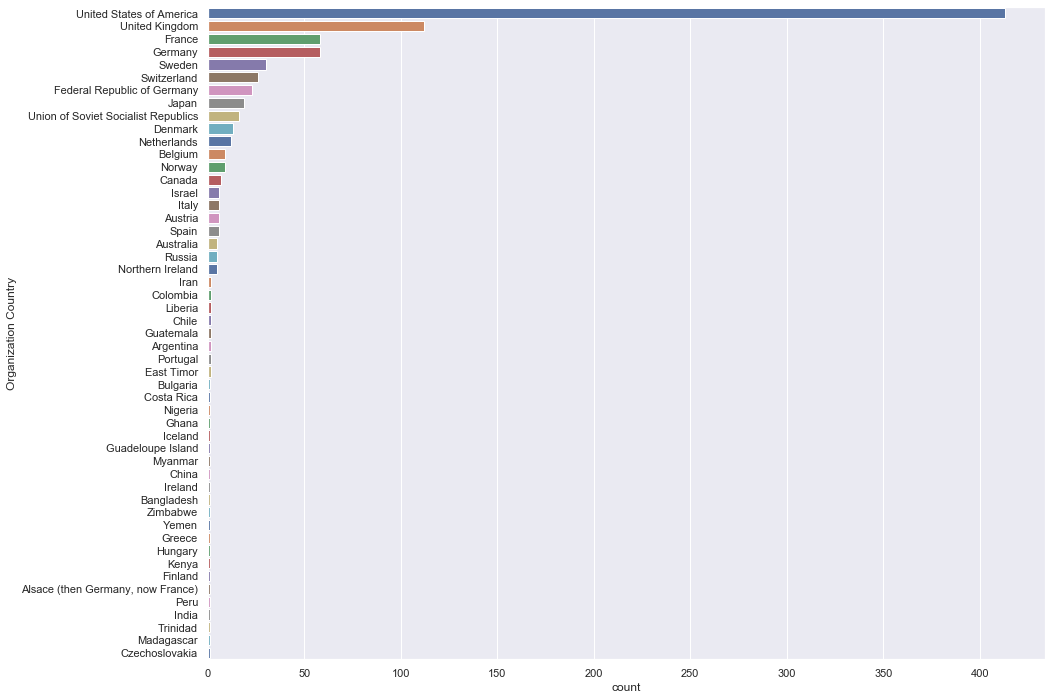

In [186]:
sns.countplot(y="Organization Country", data=data,order=data["Organization Country"].value_counts().index,palette='deep')
sns.set(rc={"figure.figsize": (15, 12)})

### Birth Country Distribution

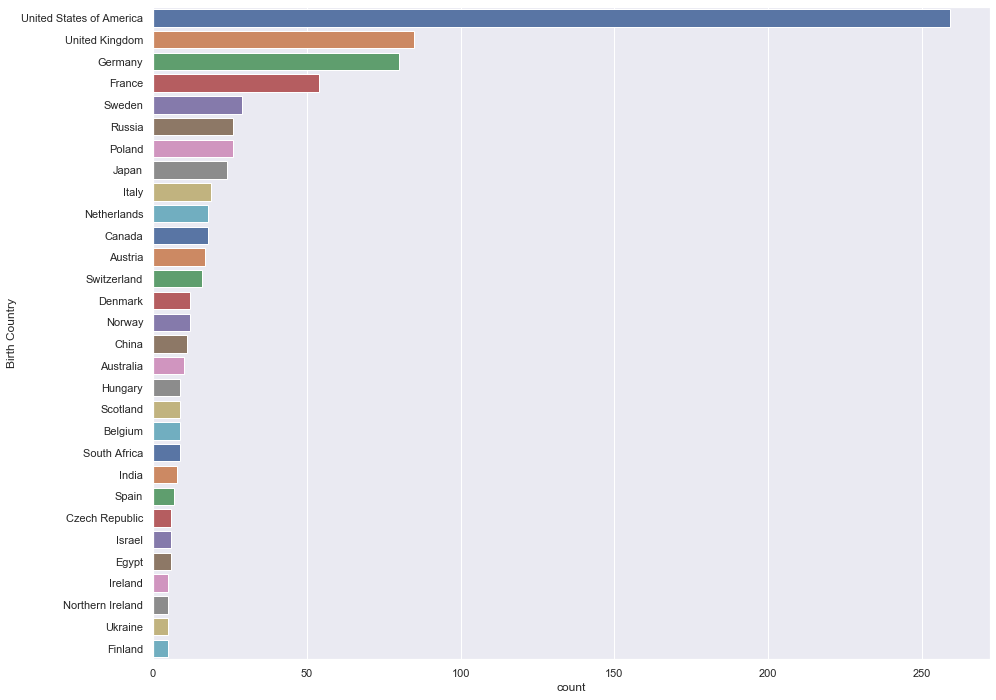

In [197]:
sns.countplot(y="Birth Country", data=data,order=data["Birth Country"].value_counts().head(30).index,palette='deep')
sns.set(rc={"figure.figsize": (15, 12)})

### Corelation analysis between the organization country and the category

In [216]:
contengency_table = pd.crosstab(data["Category"],data["Organization Country"], margins= False)
contengency_table


Organization Country,"Alsace (then Germany, now France)",Argentina,Australia,Austria,Bangladesh,Belgium,Bulgaria,Canada,Chile,China,...,Russia,Spain,Sweden,Switzerland,Trinidad,Union of Soviet Socialist Republics,United Kingdom,United States of America,Yemen,Zimbabwe
Category,,,,,,,,,,,,,,,,,,,,,
Chemistry,0,1,0,1,0,1,0,3,0,0,...,0,0,5,6,0,1,27,74,0,0
Economics,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,6,62,0,0
Literature,0,0,0,0,0,1,1,0,2,0,...,0,5,7,2,1,5,10,39,0,0
Medicine,0,1,4,4,0,3,0,2,0,1,...,1,1,7,8,0,0,31,106,0,0
Peace,0,0,0,0,1,3,0,0,0,0,...,2,0,5,3,0,2,13,33,1,1
Physics,1,0,1,1,0,1,0,2,0,0,...,2,0,4,7,0,7,25,99,0,0


#### From the above table it is shown that the USA is top country in all the categories followed by the UK 

In [195]:
st.chi2_contingency(contengency_table)

(416.7448150168042,
 1.773631129090637e-10,
 250,
 array([[1.98412698e-01, 3.96825397e-01, 9.92063492e-01, 1.19047619e+00,
         1.98412698e-01, 1.78571429e+00, 1.98412698e-01, 1.38888889e+00,
         3.96825397e-01, 1.98412698e-01, 3.96825397e-01, 1.98412698e-01,
         1.98412698e-01, 2.57936508e+00, 3.96825397e-01, 4.56349206e+00,
         1.98412698e-01, 1.15079365e+01, 1.15079365e+01, 1.98412698e-01,
         1.98412698e-01, 1.98412698e-01, 3.96825397e-01, 1.98412698e-01,
         1.98412698e-01, 1.98412698e-01, 3.96825397e-01, 1.98412698e-01,
         1.19047619e+00, 1.19047619e+00, 3.76984127e+00, 1.98412698e-01,
         3.96825397e-01, 1.98412698e-01, 1.98412698e-01, 2.38095238e+00,
         1.98412698e-01, 9.92063492e-01, 1.78571429e+00, 1.98412698e-01,
         3.96825397e-01, 9.92063492e-01, 1.19047619e+00, 5.95238095e+00,
         5.15873016e+00, 1.98412698e-01, 3.17460317e+00, 2.22222222e+01,
         8.19444444e+01, 1.98412698e-01, 1.98412698e-01],
        [8.84353

- p-value = 1.773631129090637e-10 which is <0.05 the hypothesis is rejected.
- So the attributes are corelated. In other word there is a relation between the organization country and the category 

### Acording to the previous statistics:
##### The mean age for winning a nobel rize is 59 
##### Medicin is the top category in which nobel prize is won
##### USA is the top country from which nobel prize winners come from either born there or belong to an organization there
##### Nobel prize winners are mosly males 
